In [ ]:
!wget -q https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/notMNIST_small.tar.gz
!tar -xzf notMNIST_small.tar.gz

In [ ]:
# 이미지 읽어서 데이터 준비하기
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

paths = glob.glob('./notMNIST_small/*/*.png')
paths = np.random.permutation(paths)
독립 = np.array([plt.imread(paths[i]) for i in range(len(paths))])
종속 = np.array([paths[i].split('/')[2] for i in range(len(paths))])
print(독립.shape, 종속.shape)

(18724, 28, 28) (18724,)


In [ ]:
종속[0:10]

array(['J', 'B', 'A', 'B', 'G', 'B', 'B', 'H', 'D', 'C'], dtype='<U1')

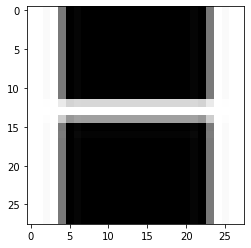

In [ ]:
plt.imshow(독립[7], cmap='gray')

In [ ]:
독립 = 독립.reshape(18724, 28, 28, 1)
종속 = pd.get_dummies(종속)
print(독립.shape, 종속.shape)

(18724, 28, 28, 1) (18724, 10)


In [ ]:
import tensorflow as tf
# 모델을 완성합니다.
X = tf.keras.layers.Input(shape=[28, 28, 1])

H = tf.keras.layers.Conv2D(6, kernel_size=5, padding='same', activation='swish')(X)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(16, kernel_size=5, activation='swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(120, activation='swish')(H)
H = tf.keras.layers.Dense(84, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
model.fit(독립, 종속, epochs=10)

Epoch 1/10
586/586 [==============================] - 34s 4ms/step - loss: 0.4824 - accuracy: 0.8615
Epoch 2/10
586/586 [==============================] - 2s 4ms/step - loss: 0.2648 - accuracy: 0.9209
Epoch 3/10
586/586 [==============================] - 2s 4ms/step - loss: 0.2072 - accuracy: 0.9369
Epoch 4/10
586/586 [==============================] - 2s 4ms/step - loss: 0.1724 - accuracy: 0.9463
Epoch 5/10
586/586 [==============================] - 2s 4ms/step - loss: 0.1444 - accuracy: 0.9547
Epoch 6/10
586/586 [==============================] - 2s 4ms/step - loss: 0.1215 - accuracy: 0.9613
Epoch 7/10
586/586 [==============================] - 2s 4ms/step - loss: 0.1030 - accuracy: 0.9683
Epoch 8/10
586/586 [==============================] - 2s 3ms/step - loss: 0.0855 - accuracy: 0.9739
Epoch 9/10
586/586 [==============================] - 2s 3ms/step - loss: 0.0713 - accuracy: 0.9774
Epoch 10/10
586/586 [==============================] - 2s 4ms/step - loss: 0.0601 - accuracy: 0.980